In [1]:
import torch
import numpy as np
torch.__version__

'1.8.0.dev20201111+cu110'

In [2]:
torch.cuda.is_available()

True

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt

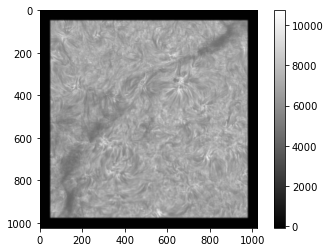

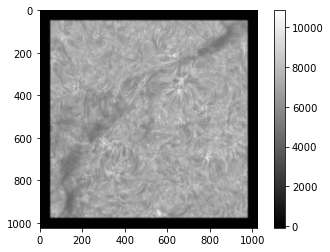

In [4]:
ha01 = fits.open("ha-01.fits")
plt.figure(1)
plt.imshow(ha01[0].data,cmap='gray')
plt.colorbar()
#plt.show()

#convert data to complex format
data01 = np.complex64(ha01[0].data)

ha02 = fits.open("ha-02.fits")
plt.figure(2)
plt.imshow(ha02[0].data,cmap='gray')
plt.colorbar()
data02 = np.complex64(ha02[0].data)

In [15]:
import cupy as cp
import time

Time using cupy:  0.046875  seconds
Finished!


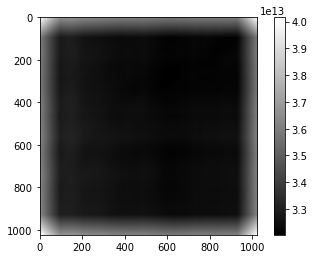

In [37]:
#get data dimensions
dims = data01.shape
x_gpu = cp.ndarray(dims,dtype=np.complex64)
x_res = cp.ndarray(dims,dtype=np.complex64)
x_spec = cp.ndarray(dims,dtype=np.complex64)
y_gpu = cp.ndarray(dims,dtype=np.complex64)
y_res = cp.ndarray(dims,dtype=np.complex64)
y_spec = cp.ndarray(dims,dtype=np.complex64)
xy_spec = cp.ndarray(dims,dtype=np.complex64)
xy_res = cp.ndarray(dims,dtype=np.complex64)

start = time.process_time()
#calculate first image
x_gpu = cp.asarray(data01)
x_res = cp.fft.fft2(x_gpu)
#x_spec = cp.fft.fftshift(x_res)
#calculate second image
y_gpu = cp.asarray(data02)
y_res = cp.fft.fft2(y_gpu)
#y_spec = cp.fft.fftshift(y_res)

#xy_spec = x_spec * y_spec #x*y with fftshift
xy_res = x_res * y_res #x*y without fftshift

#xy_tmp_00 = cp.asnumpy(xy_spec)
#xy_tmp_01 = cp.asnumpy(xy_res)

xy_res = cp.fft.ifft2(xy_res)

xy_tmp_02 = cp.asnumpy(xy_res)

end = time.process_time()

#plt.figure(3)
#plt.imshow(np.abs(xy_tmp_00.real),cmap='gray',vmin=0.0,vmax=2.0e16)
#plt.colorbar()

plt.figure(3)
plt.imshow(np.abs(xy_tmp_02.real),cmap='gray')
plt.colorbar()

#print("\n")
print("Time using cupy: %9.6f  seconds" %(end-start))
print("Finished!")
plt.show()

In [32]:
import torch.fft

In [33]:

#tnum01 = tnum01.cuda()
#tnum01.is_cuda

In [34]:

#tnum02.is_cuda

In [36]:
s1 = time.process_time()
tnum01 = torch.from_numpy(data01).cuda()
tnum02 = torch.from_numpy(data02).cuda()
#print(tnum01.size())
#fft01=torch.fft.fft(torch.fft.fft(tnum01, dim=0), dim=1)
#fft02=torch.fft.fft(torch.fft.fft(tnum02, dim=0), dim=1)
fft01=torch.fft.fftn(tnum01)
#print(fft01.size())
fft02=torch.fft.fftn(tnum02)
#print(fft02.size())
fft03=torch.mul(fft01,fft02)
ifft01=torch.fft.ifftn(fft03)
print(ifft01.size())
e1 = time.process_time()
print("Time using torch.fft: %9.10f  seconds" %(e1-s1))

torch.Size([1024, 1024])
Time using torch.fft: 0.0312500000  seconds


In [24]:
res=ifft01.cpu().numpy()
#np.size(res)

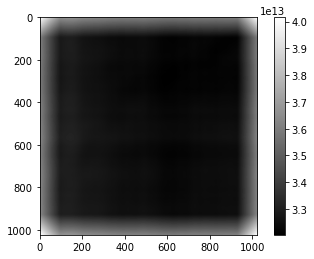

In [12]:
plt.figure(4)
plt.imshow(np.abs(res.real),cmap='gray')
plt.colorbar()